In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-extracted-dataset/News_category_extract_dataset.csv


In [2]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.4.1
Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1


In [3]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.3 MB 61 kB/s s eta 0:00:01    |██████████████▎                 | 48.8 MB 25.9 MB/s eta 0:00:03
     |████████████████████████████████| 3.1 MB 40.7 MB/s eta 0:00:01
     |████████████████████████████████| 488 kB 52.8 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 5.1 MB/s  eta 0:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cloud 0.1.13 requires tensorboard>=2.3.0, but you have tensorboard 1.14.0 which is incomp

In [4]:
!pip uninstall keras -y

Found existing installation: Keras 2.4.3
Uninstalling Keras-2.4.3:
  Successfully uninstalled Keras-2.4.3


In [5]:
!pip install keras==2.3.0

     |████████████████████████████████| 377 kB 62 kB/s  eta 0:00:01


In [6]:
!pip install shap==0.30.1

     |████████████████████████████████| 244 kB 1.0 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.30.1-cp37-cp37m-linux_x86_64.whl size=365457 sha256=24653642c2777fbfa036dd29ced5bf12c750da9b6f2bc875b487257621bfc333
  Stored in directory: /root/.cache/pip/wheels/80/fb/a6/7b0f368333133a608cda4998454e768d397c04772990a5e3bf
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.39.0
    Uninstalling shap-0.39.0:
      Successfully uninstalled shap-0.39.0


In [7]:
import tensorflow as tf
import keras
import shap

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [8]:
print(keras.__version__)
print(tf.__version__)
print(shap.__version__)

2.3.0
1.14.0
0.30.1


In [9]:
import pandas as pd
import numpy as np
import nltk
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from nltk.corpus import stopwords
from keras.utils import to_categorical
from sklearn import preprocessing

In [10]:
data = pd.read_csv('../input/news-extracted-dataset/News_category_extract_dataset.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
data.shape

(70257, 4)

In [11]:
#data = data.sample(frac=0.2, random_state=99).reset_index(drop=True)
data = shuffle(data, random_state=22)
data = data.reset_index(drop=True)
data.shape

(70257, 4)

In [12]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 43059 unique tokens.


In [13]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data['clean_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (70257, 200)


In [14]:
le = preprocessing.LabelEncoder()
labels=data['category'].values
labels_clf=le.fit_transform(labels)
classes=le.classes_

In [15]:
classes

array(['ENTERTAINMENT', 'POLITICS', 'TRAVEL', 'WELLNESS'], dtype=object)

In [16]:
cat_labels=labels_clf
cat_labels = to_categorical(cat_labels)

In [17]:
cat_labels

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split
Y=cat_labels
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_test)

(49179, 200) (49179, 4)
(21078, 200) (21078, 4)
[[   0    0    0 ...   25  104  291]
 [   0    0    0 ... 2432  384  381]
 [   0    0    0 ...  287  246 2309]
 ...
 [   0    0    0 ...  575  218  124]
 [   0    0    0 ...   30 1325   55]
 [   0    0    0 ...  273 2848 2549]]


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 5,080,804
Trainable params: 5,080,804
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
from keras.callbacks import EarlyStopping
epochs = 20
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 44261 samples, validate on 4918 samples
Epoch 1/20
44261/44261 [==============================] - 228s 5ms/step - loss: 0.4836 - accuracy: 0.8225 - val_loss: 0.2699 - val_accuracy: 0.9150
Epoch 2/20
44261/44261 [==============================] - 229s 5ms/step - loss: 0.1878 - accuracy: 0.9409 - val_loss: 0.2561 - val_accuracy: 0.9174
Epoch 3/20
44261/44261 [==============================] - 229s 5ms/step - loss: 0.1100 - accuracy: 0.9661 - val_loss: 0.2827 - val_accuracy: 0.9154
Epoch 4/20
44261/44261 [==============================] - 228s 5ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.3170 - val_accuracy: 0.9093
Epoch 5/20
44261/44261 [==============================] - 228s 5ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.3882 - val_accuracy: 0.9054


In [21]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

21078/21078 [==============================] - 30s 1ms/step
Test set
  Loss: 0.413
  Accuracy: 0.899


In [22]:
# select a set of samples to take an expectation over
distrib_samples = X_train[:100]
session = keras.backend.tensorflow_backend.get_session()
# session had to be manually specified
# otherwise looked for Keras.._SESSION ct. which doesn't exist!
explainer = shap.DeepExplainer(model, distrib_samples, session)
num_explanations = 10

In [23]:
shap_values = explainer.shap_values(X_test[:num_explanations])
print('Shape of shap_values:', np.shape(shap_values))
shap_values

Shape of shap_values: (4, 10, 200)


[array([[ 0.        ,  0.        ,  0.        , ..., -0.00148862,
          0.00196403, -0.03327381],
        [ 0.        ,  0.        ,  0.        , ...,  0.00035695,
          0.02003002,  0.04436608],
        [ 0.        ,  0.        ,  0.        , ..., -0.00196366,
         -0.00674119, -0.01371301],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.01784646,
         -0.00959659,  0.00901173],
        [ 0.        ,  0.        ,  0.        , ..., -0.00906477,
         -0.00630387, -0.01049424],
        [ 0.        ,  0.        ,  0.        , ..., -0.0083311 ,
         -0.00825436,  0.002108  ]]),
 array([[ 0.        ,  0.        ,  0.        , ..., -0.03218036,
          0.06268769, -0.18422935],
        [ 0.        ,  0.        ,  0.        , ...,  0.01102835,
         -0.00624394, -0.02691571],
        [ 0.        ,  0.        ,  0.        , ...,  0.01697961,
         -0.00515342,  0.00370137],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.05951264,
          0.02102971, -0.02681601],
        [ 0.        ,  0.        ,  0.        , ..., -0.00800306,
         -0.00855587, -0.01129303],
        [ 0.        ,  0.        ,  0.        , ...,  0.01912559,
          0.01445693, -0.00631876]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          5.92692545e-02, -7.46608462e-02,  3.12579876e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.42850948e-03, -5.31271412e-03, -7.78178235e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.97457513e-03, -2.04096035e-03, -9.53072102e-03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.12026248e-02, -9.23888884e-03,  1.43688041e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -5.18185566e-03,  5.67324279e-04, -3.37945465e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -3.52625844e-03, -4.50912497e-03, -5.81746362e-05]]),
 array([[ 0.        ,  0.        ,  0.        , ..., -0.02560027,
          0.01000912, -0.0950767 ],
        [ 0.        ,  0.        ,  0.        , ..., -0.00696615,
         -0.00847368, -0.009683  ],
        [ 0.        ,  0.        ,  0.        , ..., -0.01004138,
          0.01393557,  0.01954237],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.03046556,
         -0.00219425,  0.01636969],
        [ 0.        ,  0.        ,  0.        , ...,  0.02224892,
          0.01429208,  0.02516697],
        [ 0.        ,  0.        ,  0.        , ..., -0.00726843,
         -0.00169313,  0.00427043]])]

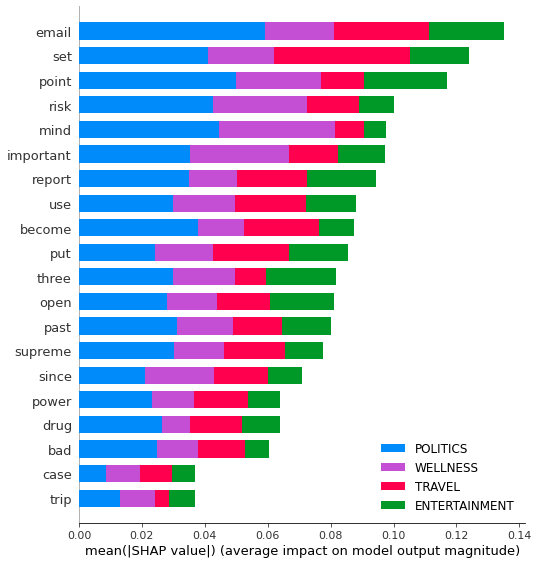

In [24]:
num2word = {}
for w in word_index.keys():
    num2word[word_index[w]] = w
x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), X_test[i]))) for i in range(10)])
shap.summary_plot(shap_values, feature_names = list(num2word.values()), class_names = list(classes))

In [25]:
word_index

{'trump': 1,
 'new': 2,
 'one': 3,
 'time': 4,
 'say': 5,
 'donald': 6,
 'people': 7,
 'year': 8,
 'day': 9,
 'life': 10,
 'get': 11,
 'like': 12,
 'make': 13,
 'way': 14,
 'u': 15,
 'said': 16,
 'health': 17,
 'president': 18,
 'want': 19,
 'state': 20,
 'world': 21,
 'may': 22,
 'know': 23,
 'thing': 24,
 'take': 25,
 'first': 26,
 'american': 27,
 'need': 28,
 'republican': 29,
 'best': 30,
 'photo': 31,
 'clinton': 32,
 'right': 33,
 'love': 34,
 'woman': 35,
 'gop': 36,
 'help': 37,
 'many': 38,
 'go': 39,
 'even': 40,
 'think': 41,
 'back': 42,
 'house': 43,
 'good': 44,
 'show': 45,
 'travel': 46,
 'week': 47,
 'come': 48,
 'obama': 49,
 'white': 50,
 'much': 51,
 'also': 52,
 'still': 53,
 'study': 54,
 'city': 55,
 'change': 56,
 'really': 57,
 'hillary': 58,
 'see': 59,
 'work': 60,
 'america': 61,
 'food': 62,
 'care': 63,
 'two': 64,
 'look': 65,
 'place': 66,
 'country': 67,
 'last': 68,
 'video': 69,
 'news': 70,
 'find': 71,
 'family': 72,
 'every': 73,
 'campaign': 74,


In [26]:
num2word

{1: 'trump',
 2: 'new',
 3: 'one',
 4: 'time',
 5: 'say',
 6: 'donald',
 7: 'people',
 8: 'year',
 9: 'day',
 10: 'life',
 11: 'get',
 12: 'like',
 13: 'make',
 14: 'way',
 15: 'u',
 16: 'said',
 17: 'health',
 18: 'president',
 19: 'want',
 20: 'state',
 21: 'world',
 22: 'may',
 23: 'know',
 24: 'thing',
 25: 'take',
 26: 'first',
 27: 'american',
 28: 'need',
 29: 'republican',
 30: 'best',
 31: 'photo',
 32: 'clinton',
 33: 'right',
 34: 'love',
 35: 'woman',
 36: 'gop',
 37: 'help',
 38: 'many',
 39: 'go',
 40: 'even',
 41: 'think',
 42: 'back',
 43: 'house',
 44: 'good',
 45: 'show',
 46: 'travel',
 47: 'week',
 48: 'come',
 49: 'obama',
 50: 'white',
 51: 'much',
 52: 'also',
 53: 'still',
 54: 'study',
 55: 'city',
 56: 'change',
 57: 'really',
 58: 'hillary',
 59: 'see',
 60: 'work',
 61: 'america',
 62: 'food',
 63: 'care',
 64: 'two',
 65: 'look',
 66: 'place',
 67: 'country',
 68: 'last',
 69: 'video',
 70: 'news',
 71: 'find',
 72: 'family',
 73: 'every',
 74: 'campaign',


In [27]:
x_test_words

array([['NONE', 'NONE', 'NONE', ..., 'take', 'another', 'vacation'],
       ['NONE', 'NONE', 'NONE', ..., 'talked', 'special', 'role'],
       ['NONE', 'NONE', 'NONE', ..., 'course', 'fact', 'loser'],
       ...,
       ['NONE', 'NONE', 'NONE', ..., 'president', 'step', 'aside'],
       ['NONE', 'NONE', 'NONE', ..., 'community', 'take', 'heed'],
       ['NONE', 'NONE', 'NONE', ..., 'mean', 'blue', 'wave']],
      dtype='<U11')

In [28]:
def convertor(sequence):   
    converted_text_list=[]
    for val in sequence:
        if val!=0:
            converted_text_list.append(vocabulary[val])
    converted_text=' '.join(converted_text_list)
    return converted_text

In [29]:
d=dict(zip([0,1,2,3],list(classes)))

In [30]:
tokens=list(word_index.keys())
values=list(word_index.values())
vocabulary=dict(zip(values,tokens))

In [31]:
idx=9
y_preds = model.predict(X_test)
print(X_test[idx])
print(convertor(X_test[idx]))
print('Actual_class:',d[np.argmax(Y_test[idx])],np.argmax(Y_test[idx]))
print('pred_class:',d[np.argmax(y_preds[idx])],np.argmax(y_preds[idx]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  789  130  189   90  374  110
  211 

In [32]:
shap.initjs()
class_num = np.argmax(y_preds[idx])
shap.force_plot(explainer.expected_value[class_num], shap_values[class_num][idx], x_test_words[idx])

In [36]:
for idx in range(0,10):
    print('sample number: ',idx)
    y_preds = model.predict(X_test)
    print(convertor(X_test[idx]))
    print('Actual_class:',d[np.argmax(Y_test[idx])],np.argmax(Y_test[idx]))
    print('pred_class:',d[np.argmax(y_preds[idx])],np.argmax(y_preds[idx]))
    class_num = np.argmax(y_preds[idx])
    shap.initjs()
    display(shap.force_plot(explainer.expected_value[class_num], shap_values[class_num][idx], x_test_words[idx]))

sample number:  0
friday talking point congress briefly interrupt vacation followed recent vacation almost two whole week actually job reward going take another vacation
Actual_class: POLITICS 1
pred_class: TRAVEL 2


sample number:  1
lupita got role trevor noah mom upcoming black panther star lupita nyong dropped daily show trevor noah talked special role
Actual_class: ENTERTAINMENT 0
pred_class: ENTERTAINMENT 0


sample number:  2
sunday week nation clean watching thursday republican debate call circus insult dignity decorum poise circus guy choke artist guy liar said trump rubio cruz finally took donald meanwhile irony alert trump said former mexican president vincente fox used filthy disgusting word ashamed even worse substance matched atmosphere extended debate poll number hard wonder much better candidate cared meaningful data much poll data like new report sea rising fastest rate century million people lose healthcare obamacare repeal deporting million people cost estimated billion take year lower real gdp trillion course fact loser
Actual_class: POLITICS 1
pred_class: POLITICS 1


sample number:  3
donald trump earth day statement president moved swiftly dismantle wide range protection environment
Actual_class: POLITICS 1
pred_class: POLITICS 1


sample number:  4
air new zealand celebrates year la london route photo ca get enough retro photo flight attendant snapshot continental old crew getup pre
Actual_class: TRAVEL 2
pred_class: TRAVEL 2


sample number:  5
awesome spot corporate retreat photo covered resort provide truly awesome setting company getaway daily schedule may still bos hand least resort make probability able squeeze fun much higher
Actual_class: TRAVEL 2
pred_class: TRAVEL 2


sample number:  6
ted cruz drop everything watch movie country teach lot problem racial profiling
Actual_class: ENTERTAINMENT 0
pred_class: POLITICS 1


sample number:  7
half american voter think trump resign sexual misconduct quinnipiac poll found percent woman percent men believe president step aside
Actual_class: POLITICS 1
pred_class: POLITICS 1


sample number:  8
possible cure insomnia suggest trying turning mobile phone night expectation efficacy started result amazing perhaps scientific community take heed
Actual_class: WELLNESS 3
pred_class: WELLNESS 3


sample number:  9
wednesday morning email democrat major election win mean blue wave
Actual_class: POLITICS 1
pred_class: POLITICS 1


In [37]:
idx=5
plots=[]
print('sample number: ',idx)
y_preds = model.predict(X_test)
print(convertor(X_test[idx]))
print('Actual_class:',d[np.argmax(Y_test[idx])],np.argmax(Y_test[idx]))
print('pred_class:',d[np.argmax(y_preds[idx])],np.argmax(y_preds[idx]))
for class_num in range(0,4):
    print('force plot for class',class_num,':',d[class_num])
    display(shap.force_plot(explainer.expected_value[class_num], shap_values[class_num][idx], x_test_words[idx]))

sample number:  5
awesome spot corporate retreat photo covered resort provide truly awesome setting company getaway daily schedule may still bos hand least resort make probability able squeeze fun much higher
Actual_class: TRAVEL 2
pred_class: TRAVEL 2
force plot for class 0 : ENTERTAINMENT


force plot for class 1 : POLITICS


force plot for class 2 : TRAVEL


force plot for class 3 : WELLNESS
